# IMPORTING LIBRARIES

In [627]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings


# IMPORT DATASET

In [500]:
df = pd.read_csv(r"C:\Users\Asus\Downloads\Amazon Sale Report.csv")
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [152]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [154]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Distribution of Product Categories

In [122]:
category_counts = df['Category'].value_counts()
print(category_counts)

Category
T-shirt     50292
Shirt       49877
Blazzer     15500
Trousers    10616
Perfume      1157
Wallet        926
Socks         440
Shoes         165
Watch           3
Name: count, dtype: int64


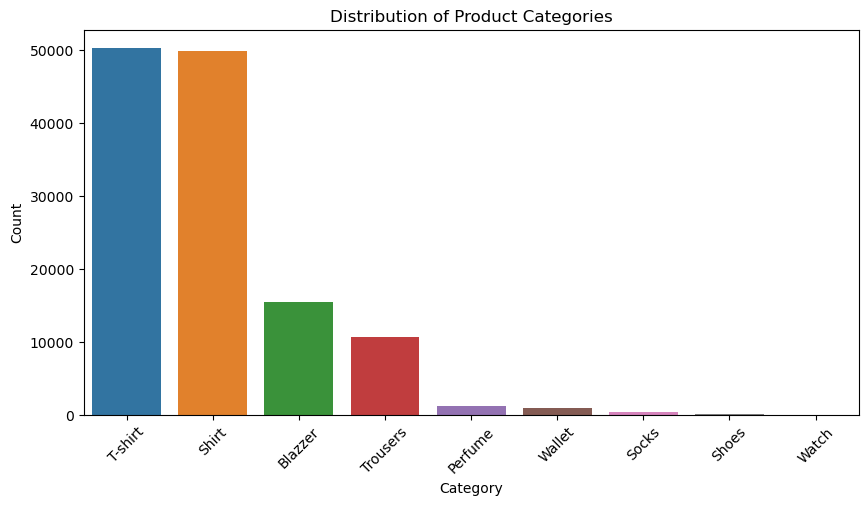

In [124]:
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of Product Sizes

In [126]:
size_counts = df['Size'].value_counts()
print(size_counts)

Size
M       22373
L       21807
XL      20549
XXL     17806
S       16776
3XL     14643
XS      11056
Free     2251
6XL       738
5XL       550
4XL       427
Name: count, dtype: int64


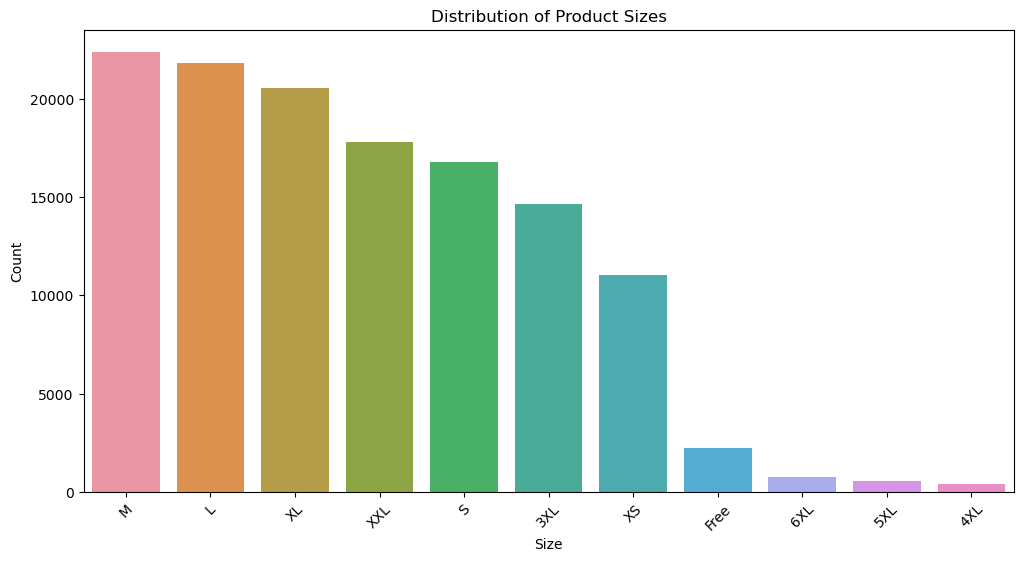

In [128]:
plt.figure(figsize=(12, 6))
sns.barplot(x=size_counts.index, y=size_counts.values)
plt.title('Distribution of Product Sizes')
plt.xlabel('Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of Quantities Sold

In [130]:
quantity_counts = df['Qty'].value_counts()
print(quantity_counts)

Qty
1     115779
0      12810
2        340
3         32
4          9
5          2
15         1
9          1
13         1
8          1
Name: count, dtype: int64


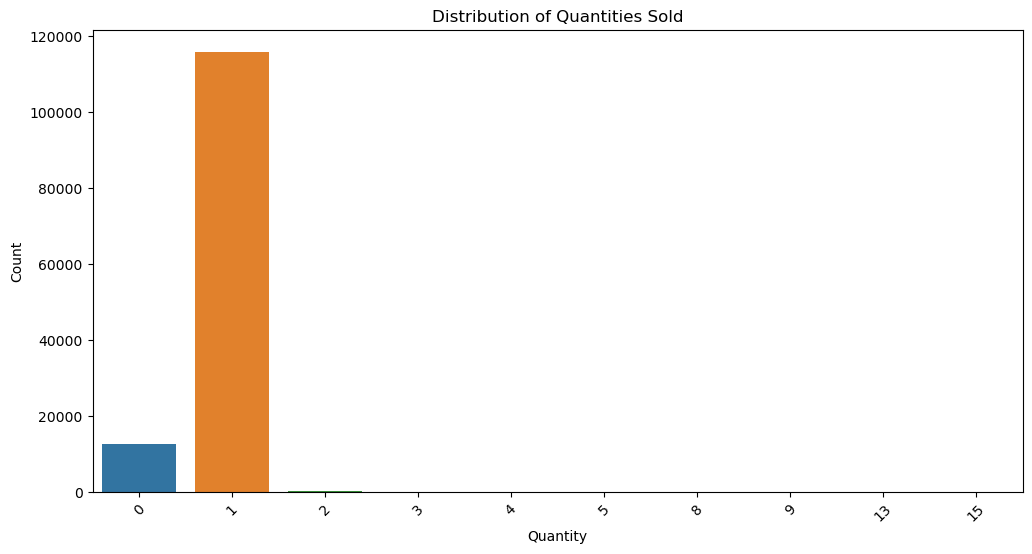

In [132]:
plt.figure(figsize=(12, 6))
sns.barplot(x=quantity_counts.index, y=quantity_counts.values)
plt.title('Distribution of Quantities Sold')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Popular Products

In [318]:
popular_products = df.groupby(['Category'])['Qty'].sum().sort_values(ascending=False)
print(popular_products)

Category
T-shirt     45292
Shirt       45044
Blazzer     13943
Trousers     9898
Perfume      1051
Wallet        863
Socks         399
Shoes         153
Watch           3
Name: Qty, dtype: int64


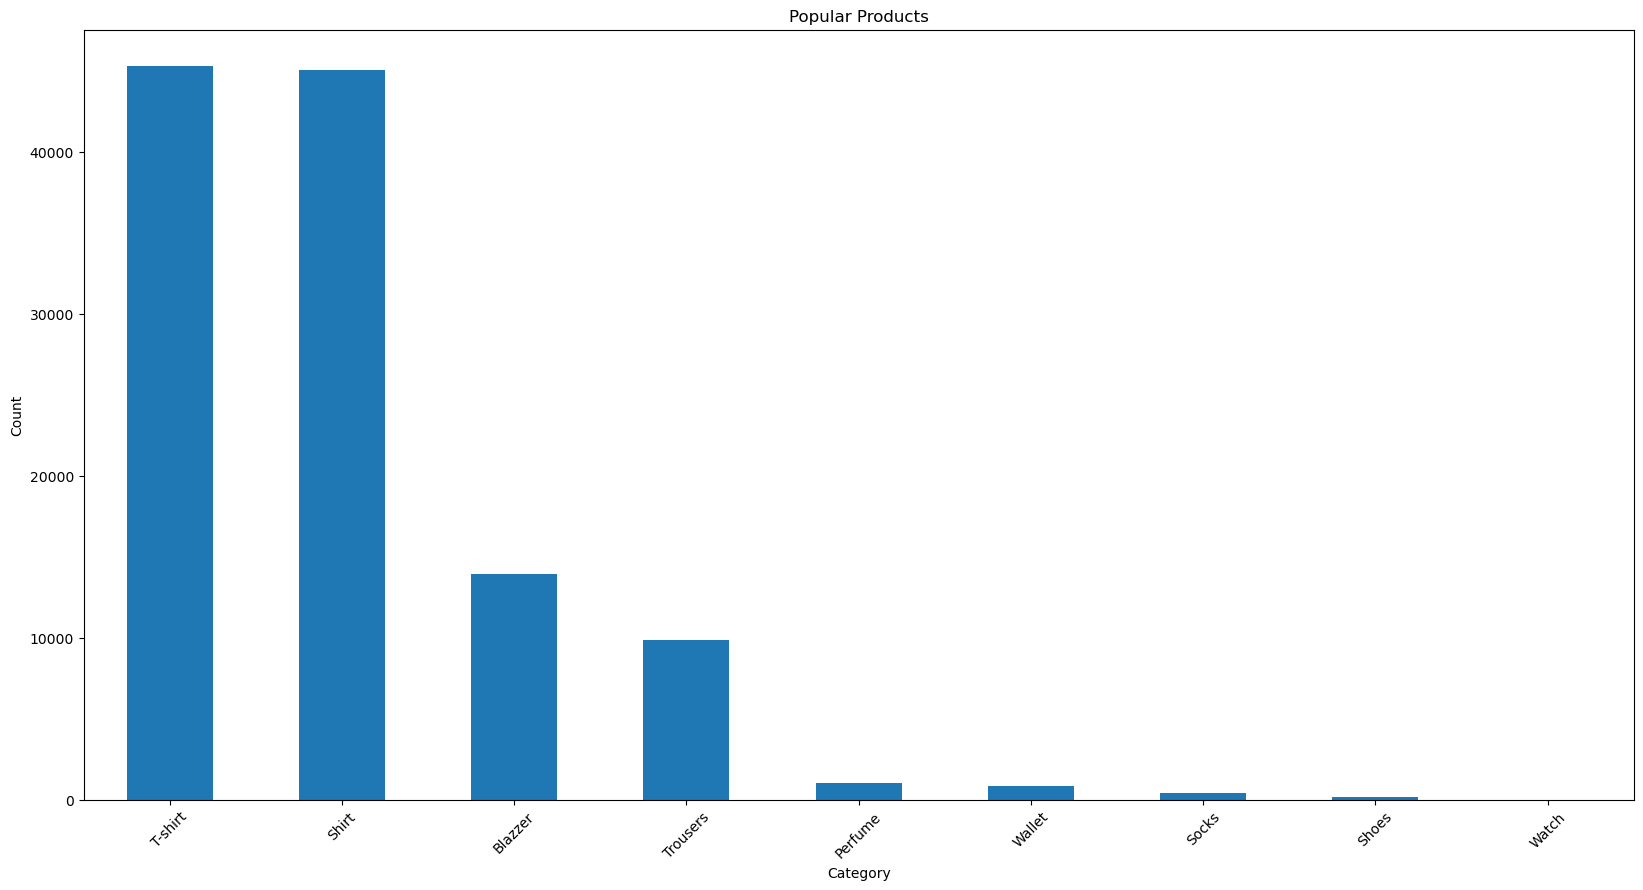

In [324]:
plt.figure(figsize=(20, 10))
popular_products.plot(kind='bar', stacked=True)
plt.title('Popular Products')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of Fulfillment Methods

In [137]:
fulfillment_counts = df['Fulfilment'].value_counts()
print(fulfillment_counts)

Fulfilment
Amazon      89713
Merchant    39263
Name: count, dtype: int64


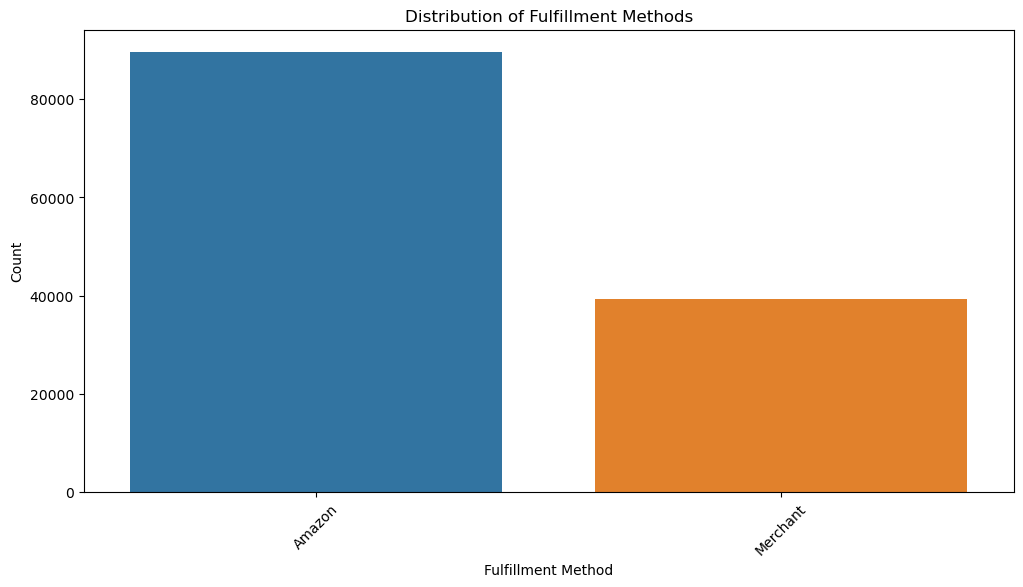

In [139]:
plt.figure(figsize=(12, 6))
sns.barplot(x=fulfillment_counts.index, y=fulfillment_counts.values)
plt.title('Distribution of Fulfillment Methods')
plt.xlabel('Fulfillment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Effectiveness of Fulfillment Methods in Delivering Orders

In [141]:
effectiveness = df.groupby(['Fulfilment', 'Courier Status']).size().unstack().fillna(0)
print(effectiveness)

Courier Status  Cancelled  On the Way  Shipped  Unshipped
Fulfilment                                               
Amazon             5940.0         0.0  77617.0     6156.0
Merchant              0.0      6870.0  31869.0      524.0


<Figure size 1200x600 with 0 Axes>

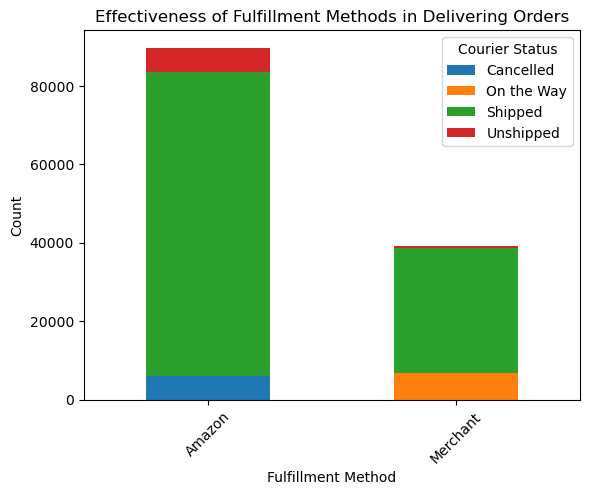

In [143]:
plt.figure(figsize=(12, 6))
effectiveness.plot(kind='bar', stacked=True)
plt.title('Effectiveness of Fulfillment Methods in Delivering Orders')
plt.xlabel('Fulfillment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Courier Status')
plt.show()

In [146]:
df['Location'] = df['ship-city'] + ', ' + df['ship-state'] + ', ' + df['ship-country']
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS,Location
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN,"MUMBAI, MAHARASHTRA, IN"
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN,"BENGALURU, KARNATAKA, IN"
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN,"NAVI MUMBAI, MAHARASHTRA, IN"
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN,"PUDUCHERRY, PUDUCHERRY, IN"
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN,"CHENNAI, TAMIL NADU, IN"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN,"HYDERABAD, TELANGANA, IN"
128972,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN,"GURUGRAM, HARYANA, IN"
128973,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN,"HYDERABAD, TELANGANA, IN"
128974,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN,"Halol, Gujarat, IN"


In [173]:
features = df[['Order ID', 'Amount', 'Qty', 'Location']]
print(features)

                   Order ID   Amount  Qty                      Location
0       405-8078784-5731545   647.62    0       MUMBAI, MAHARASHTRA, IN
1       171-9198151-1101146   406.00    1      BENGALURU, KARNATAKA, IN
2       404-0687676-7273146   329.00    1  NAVI MUMBAI, MAHARASHTRA, IN
3       403-9615377-8133951   753.33    0    PUDUCHERRY, PUDUCHERRY, IN
4       407-1069790-7240320   574.00    1       CHENNAI, TAMIL NADU, IN
...                     ...      ...  ...                           ...
128971  406-6001380-7673107   517.00    1      HYDERABAD, TELANGANA, IN
128972  402-9551604-7544318   999.00    1         GURUGRAM, HARYANA, IN
128973  407-9547469-3152358   690.00    1      HYDERABAD, TELANGANA, IN
128974  402-6184140-0545956  1199.00    1            Halol, Gujarat, IN
128975  408-7436540-8728312   696.00    1      Raipur, CHHATTISGARH, IN

[128976 rows x 4 columns]


# Orders from Top 10 States

In [498]:
States_count = df['ship-state'].value_counts()
print(States_count)

ship-state
MAHARASHTRA               22272
KARNATAKA                 17324
TAMIL NADU                11488
TELANGANA                 11330
UTTAR PRADESH             10646
                          ...  
Mizoram                       1
rajsthan                      1
Punjab/Mohali/Zirakpur        1
Rajsthan                      1
orissa                        1
Name: count, Length: 69, dtype: int64


In [288]:
States_count_top = States_count.head(10)
States_count_top

ship-state
MAHARASHTRA       22272
KARNATAKA         17324
TAMIL NADU        11488
TELANGANA         11330
UTTAR PRADESH     10646
DELHI              6778
KERALA             6577
WEST BENGAL        5962
ANDHRA PRADESH     5427
Gujarat            4482
Name: count, dtype: int64

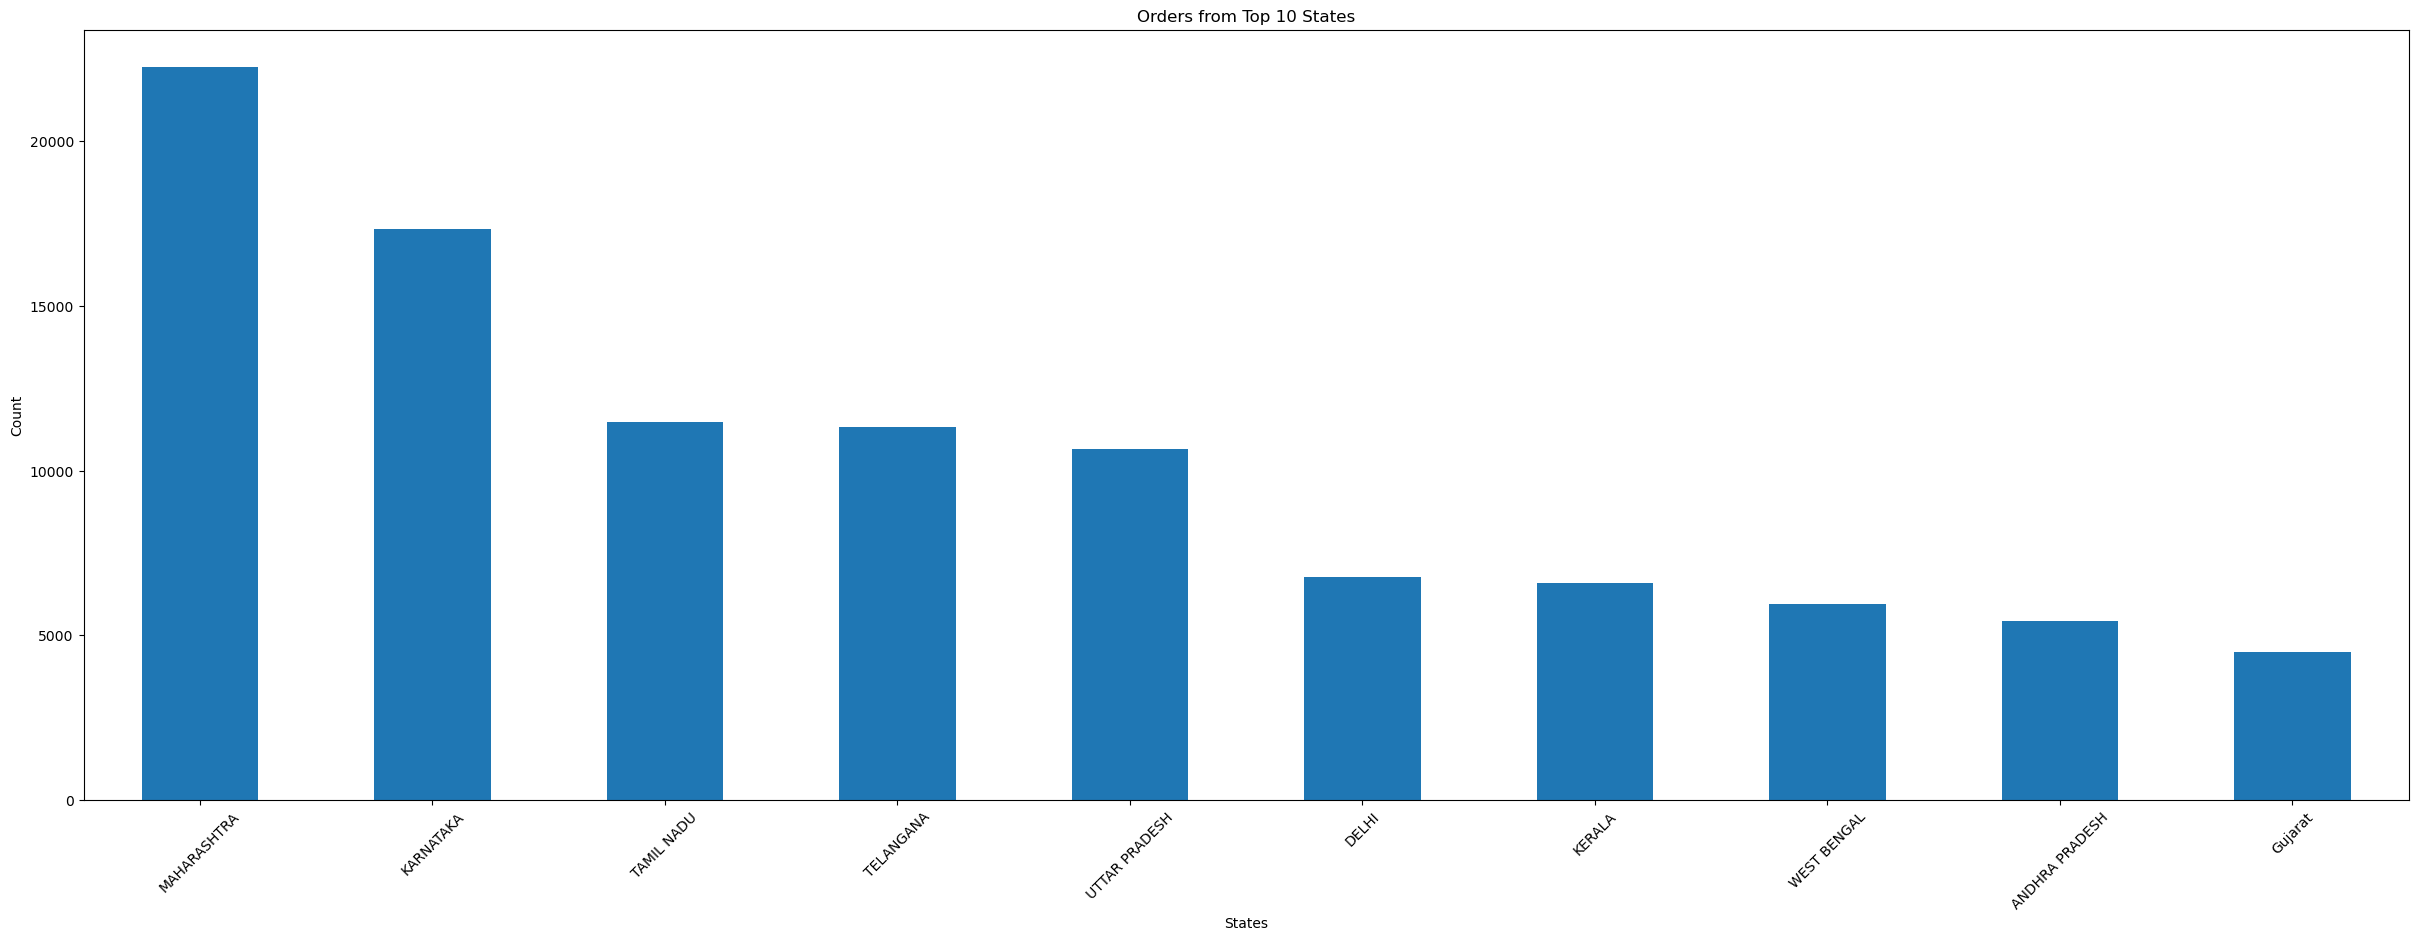

In [296]:
plt.figure(figsize=(30, 10))
States_count_top.plot(kind='bar', stacked=True)
plt.title('Orders from Top 10 States')
plt.xlabel('States')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Orders from Top 10 Cities

In [502]:
city_count = df['ship-city'].value_counts()
print(city_count)

ship-city
BENGALURU                11208
HYDERABAD                 8077
MUMBAI                    6125
NEW DELHI                 5792
CHENNAI                   5430
                         ...  
PERUMBALA                    1
SONGADH TAPI DISTRICT        1
oodlabari                    1
Batika                       1
Halol                        1
Name: count, Length: 8948, dtype: int64


In [504]:
city_count_top = city_count.head(10)
city_count_top

ship-city
BENGALURU    11208
HYDERABAD     8077
MUMBAI        6125
NEW DELHI     5792
CHENNAI       5430
PUNE          3863
KOLKATA       2380
GURUGRAM      1865
THANE         1701
LUCKNOW       1462
Name: count, dtype: int64

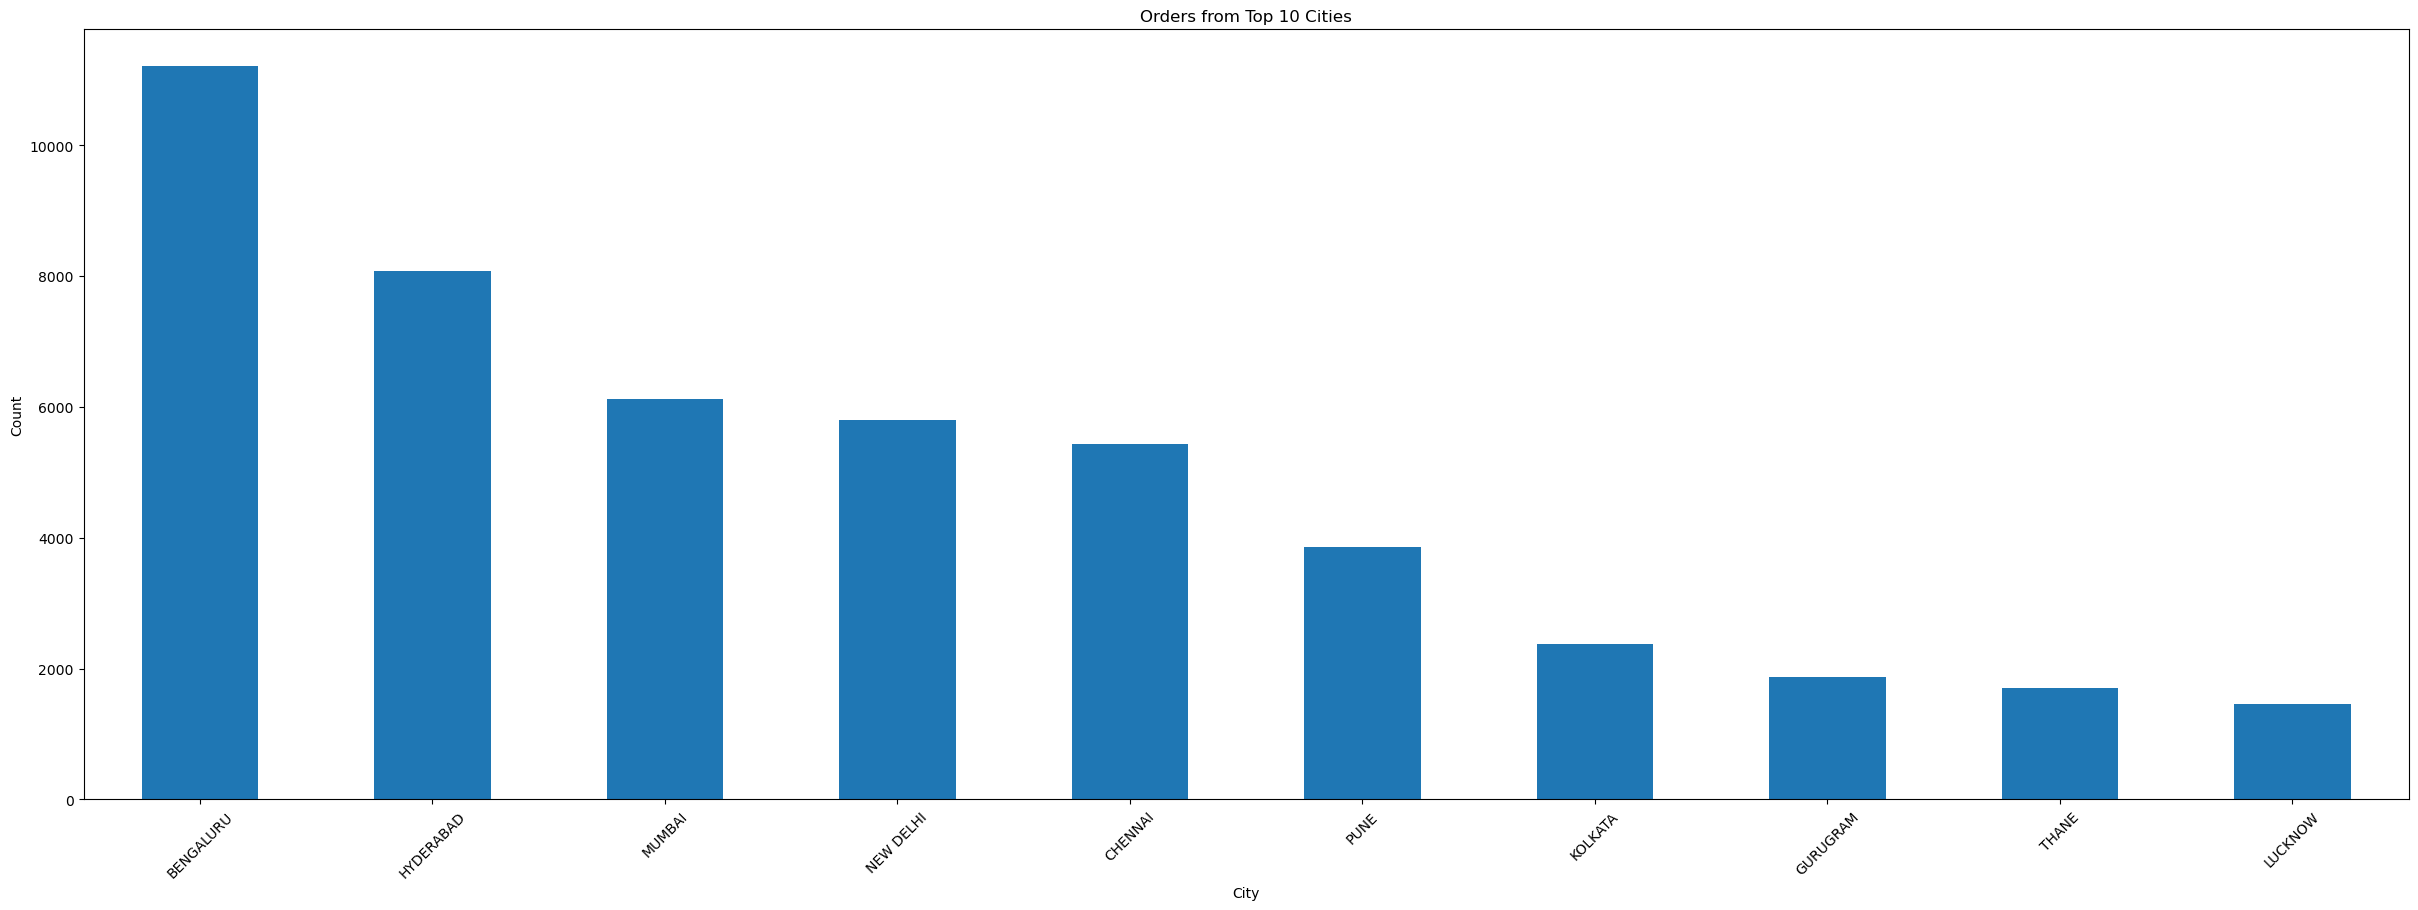

In [506]:
plt.figure(figsize=(30, 10))
city_count_top.plot(kind='bar', stacked=True)
plt.title('Orders from Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [336]:
Sales_count = df['Amount'].sum()
print(Sales_count)

78590170.24999997


# Sales from Top 10 States

In [459]:
State_Sales = df.groupby(['ship-state'] , as_index = False)["Amount"].sum()
State_Sales_top = State_Sales.sort_values('Amount' ,  ascending=False).head(10)
State_Sales_top = State_Sales_top.set_index('ship-state')


In [461]:
amount_counts = State_Sales_top['Amount'].value_counts()
print(amount_counts)

Amount
13340333.05    1
10480694.22    1
6915018.08     1
6823947.08     1
6519182.30     1
4232738.97     1
3823559.58     1
3507212.82     1
3217859.86     1
2880355.99     1
Name: count, dtype: int64


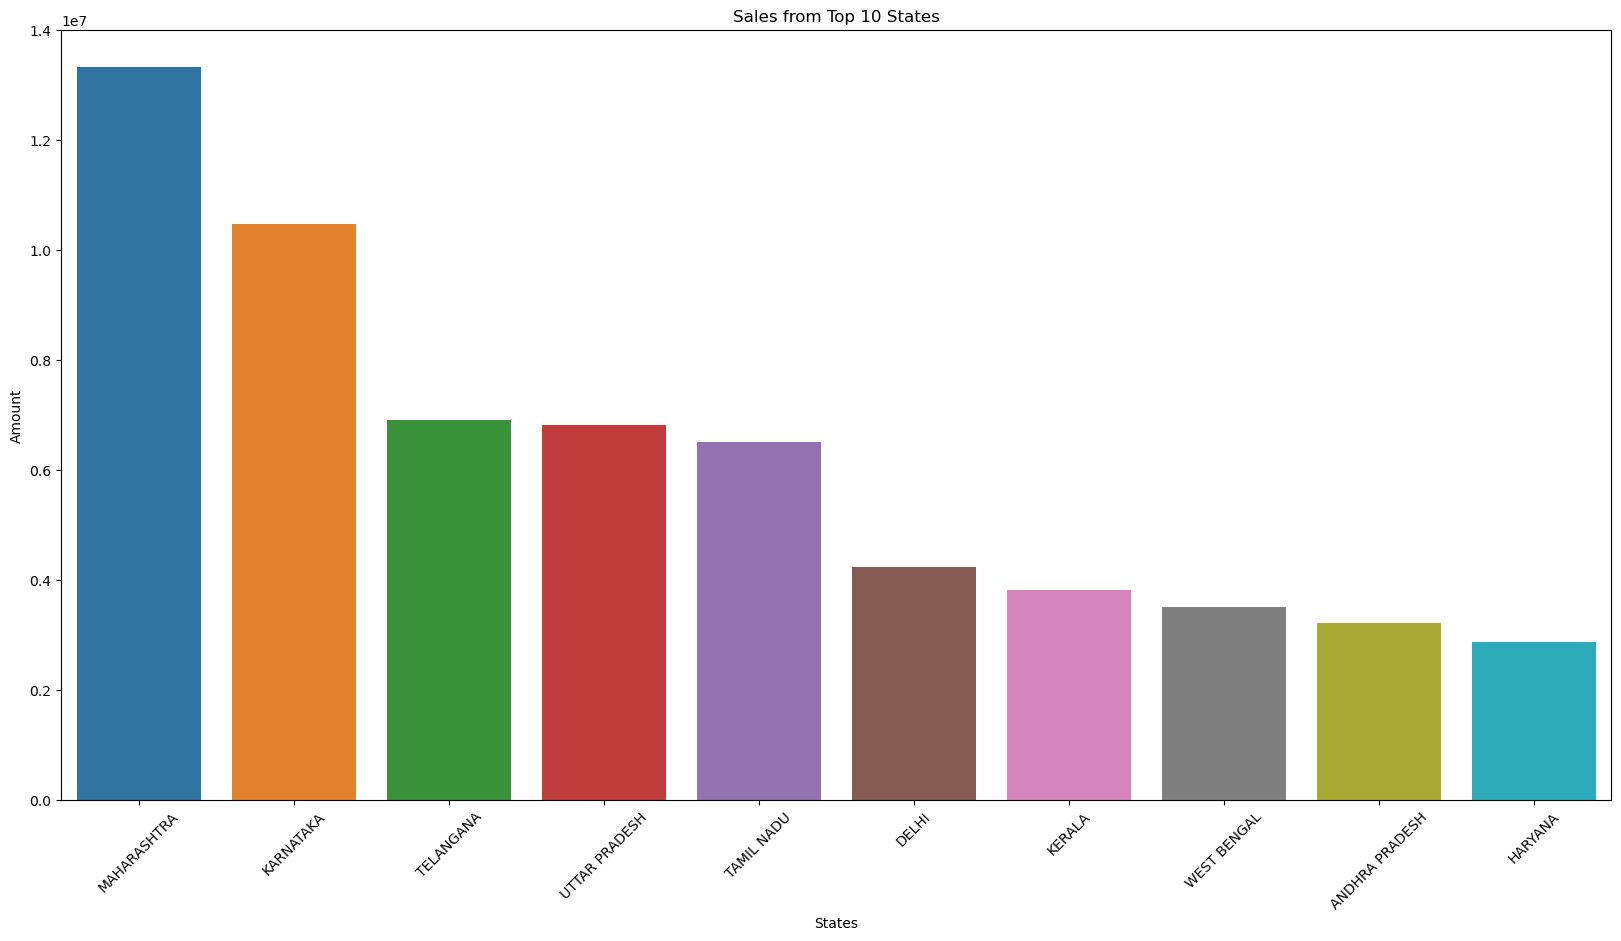

In [478]:
plt.figure(figsize=(20,10))
sns.barplot(x=State_Sales_top.index, y=amount_counts.index)
plt.title('Sales from Top 10 States')
plt.xlabel('States')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

# Sales from Top 10 Cities

In [535]:
city_Sales = df.groupby(['ship-city'] , as_index = False)["Amount"].sum()
city_Sales_top = city_Sales.sort_values('Amount' ,  ascending=False).head(10)
city_Sales_top = city_Sales_top.set_index('ship-city')

In [537]:
city_amount_counts = city_Sales_top['Amount'].value_counts()
print(city_amount_counts)

Amount
6845390.65    1
4946394.25    1
3701843.04    1
3612512.78    1
3103415.74    1
2342011.18    1
1413603.87    1
1220562.74    1
1004503.29    1
938076.34     1
Name: count, dtype: int64


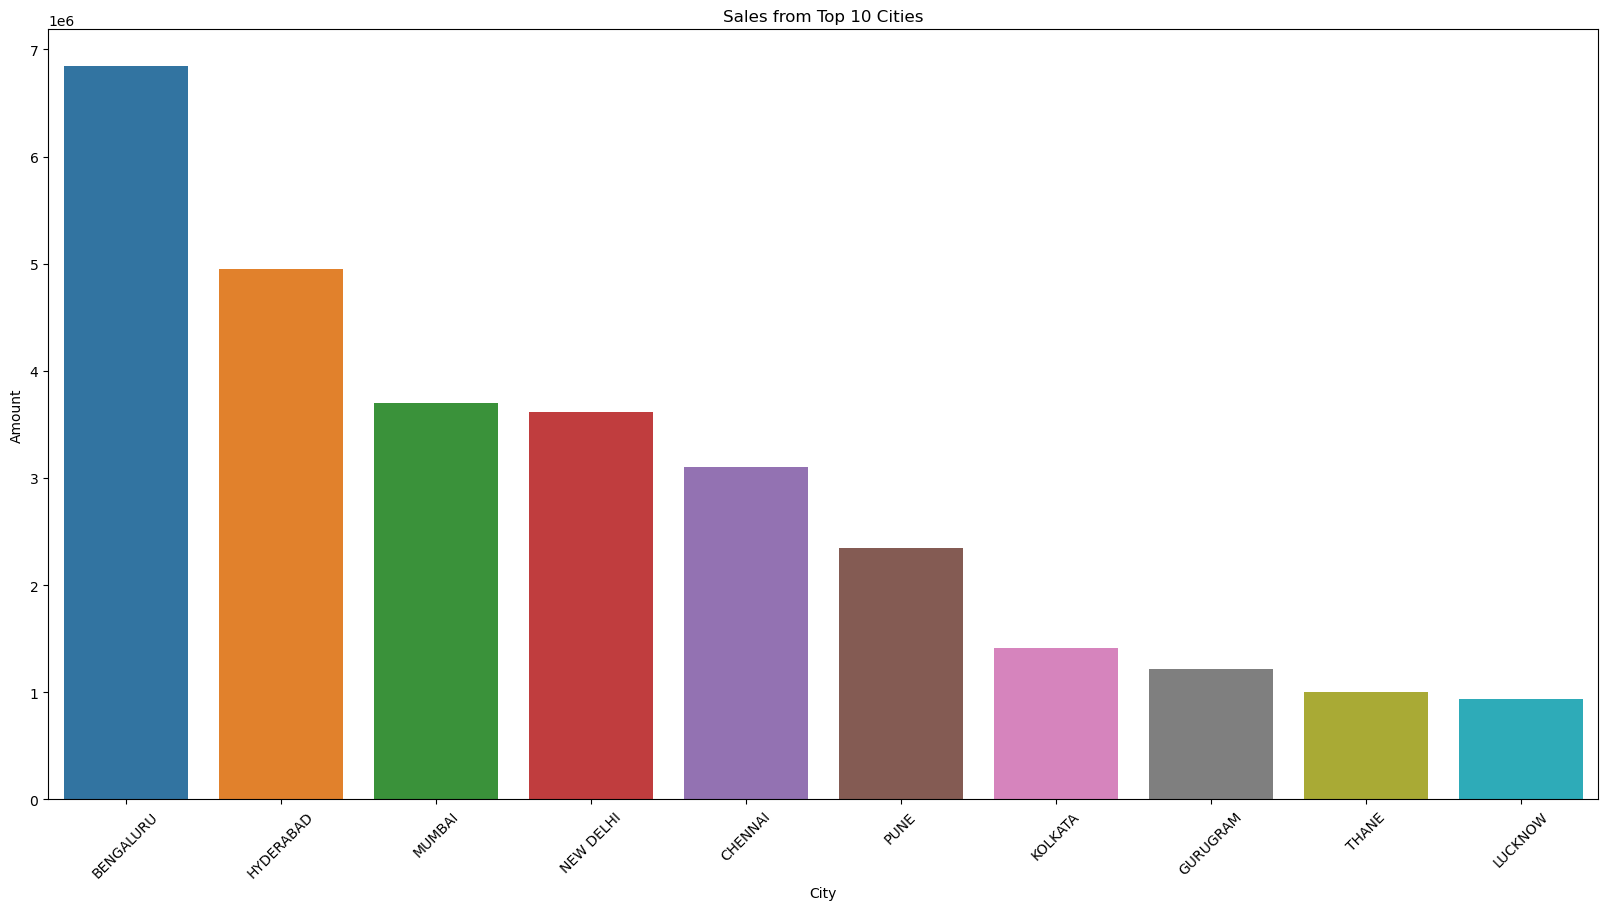

In [539]:
plt.figure(figsize=(20,10))
sns.barplot(x=city_Sales_top.index, y=city_amount_counts.index)
plt.title('Sales from Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

# Sales from Different Categories

In [480]:
Category_Sales = df.groupby(['Category'])['Amount'].sum().sort_values(ascending=False)
print(Category_Sales)

Category
T-shirt     39206756.65
Shirt       21297770.08
Blazzer     11215104.12
Trousers     5346286.30
Perfume       789419.66
Wallet        458408.18
Socks         150757.50
Shoes         124752.76
Watch            915.00
Name: Amount, dtype: float64


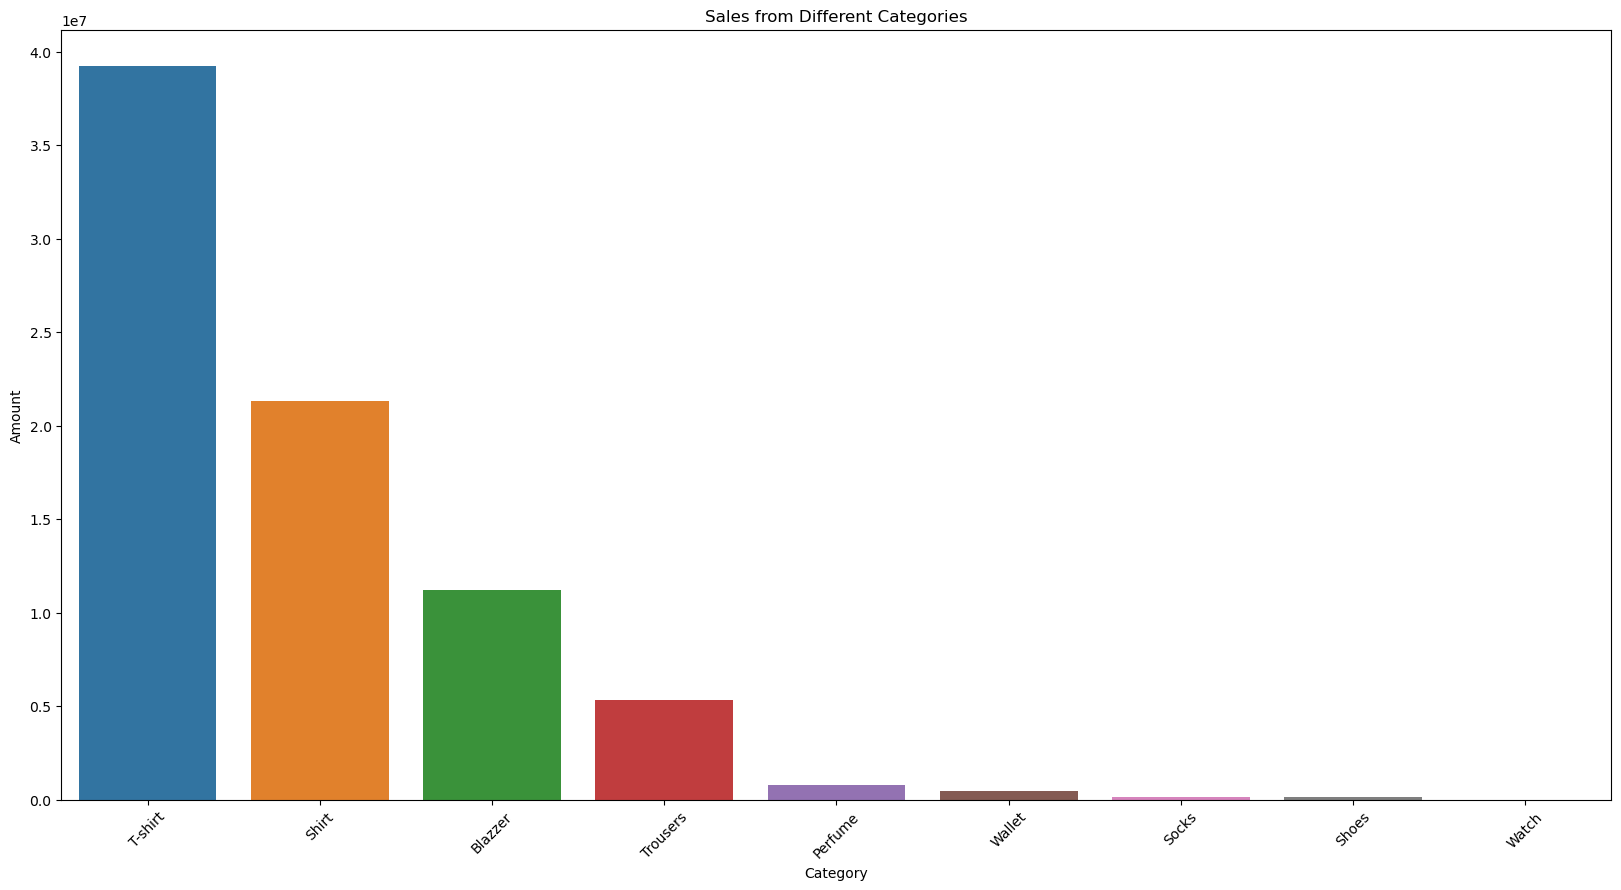

In [494]:
plt.figure(figsize=(20,10))
sns.barplot(x=Category_Sales.index, y=Category_Sales.values )
plt.title('Sales from Different Categories')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

# Status of Orders

In [568]:
status_counts = df['Status'].value_counts()
print(status_counts)

Status
Shipped                          77815
Shipped - Delivered to Buyer     28756
Cancelled                        18334
Shipped - Returned to Seller      1954
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64


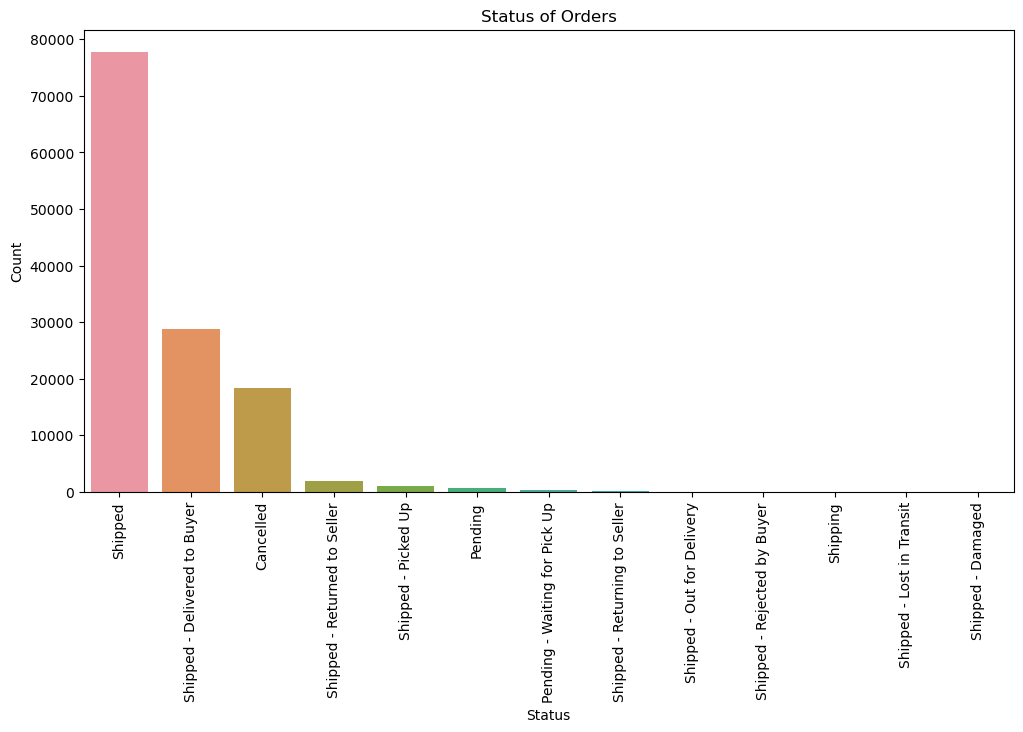

In [570]:
plt.figure(figsize=(12, 6))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Status of Orders')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Ship Service of Orders

In [545]:
ship_service_level_counts = df['ship-service-level'].value_counts()
print(ship_service_level_counts)

ship-service-level
Expedited    88630
Standard     40346
Name: count, dtype: int64


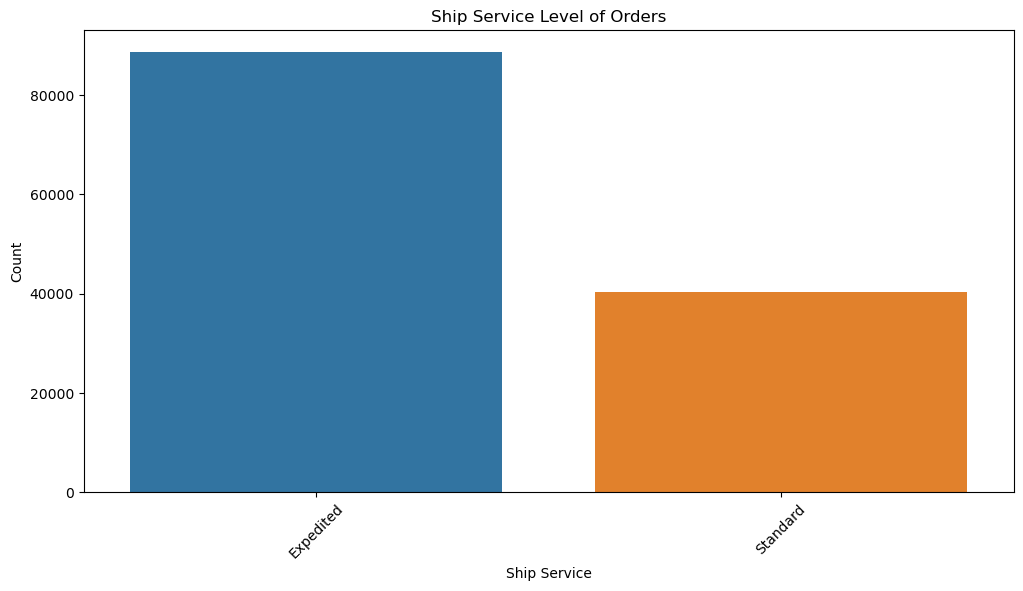

In [552]:
plt.figure(figsize=(12, 6))
sns.barplot(x=ship_service_level_counts.index, y=ship_service_level_counts.values)
plt.title('Ship Service Level of Orders')
plt.xlabel('Ship Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Number of B2B orders

In [547]:
B2B_counts = df['B2B'].value_counts()
print(B2B_counts)

B2B
False    128104
True        872
Name: count, dtype: int64


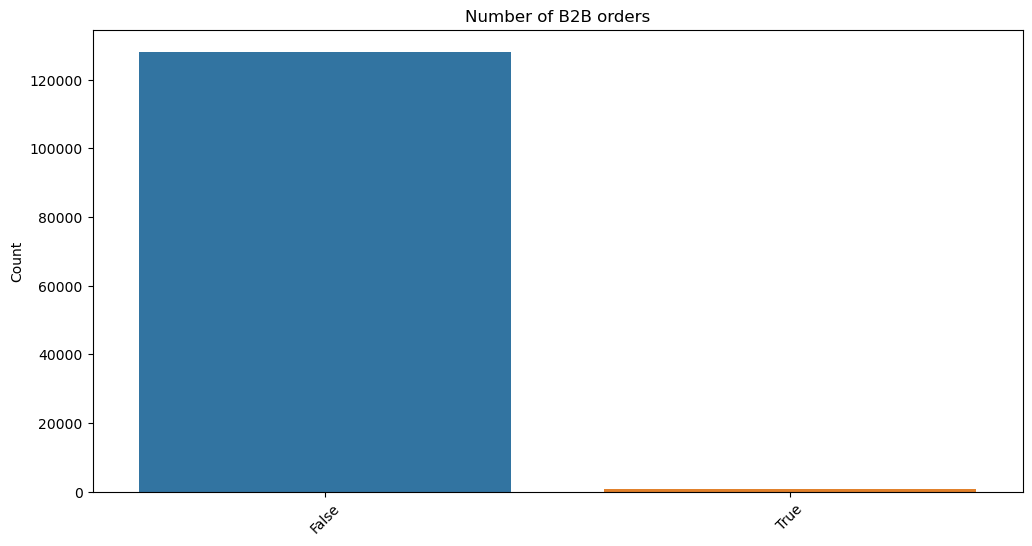

In [555]:
plt.figure(figsize=(12, 6))
sns.barplot(x=B2B_counts.index, y=B2B_counts.values)
plt.title('Number of B2B orders')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Number of Orders per day

In [629]:
warnings.filterwarnings('ignore')

In [631]:
number_products = df.groupby(['Date'])['Qty'].sum().sort_values(ascending=True)
print(number_products)

Date
03-31-22       156
06-29-22       627
06-24-22       935
06-25-22       940
06-23-22       965
              ... 
04-14-22      1695
04-20-22      1696
05-04-2022    1811
05-03-2022    1863
05-02-2022    1889
Name: Qty, Length: 91, dtype: int64


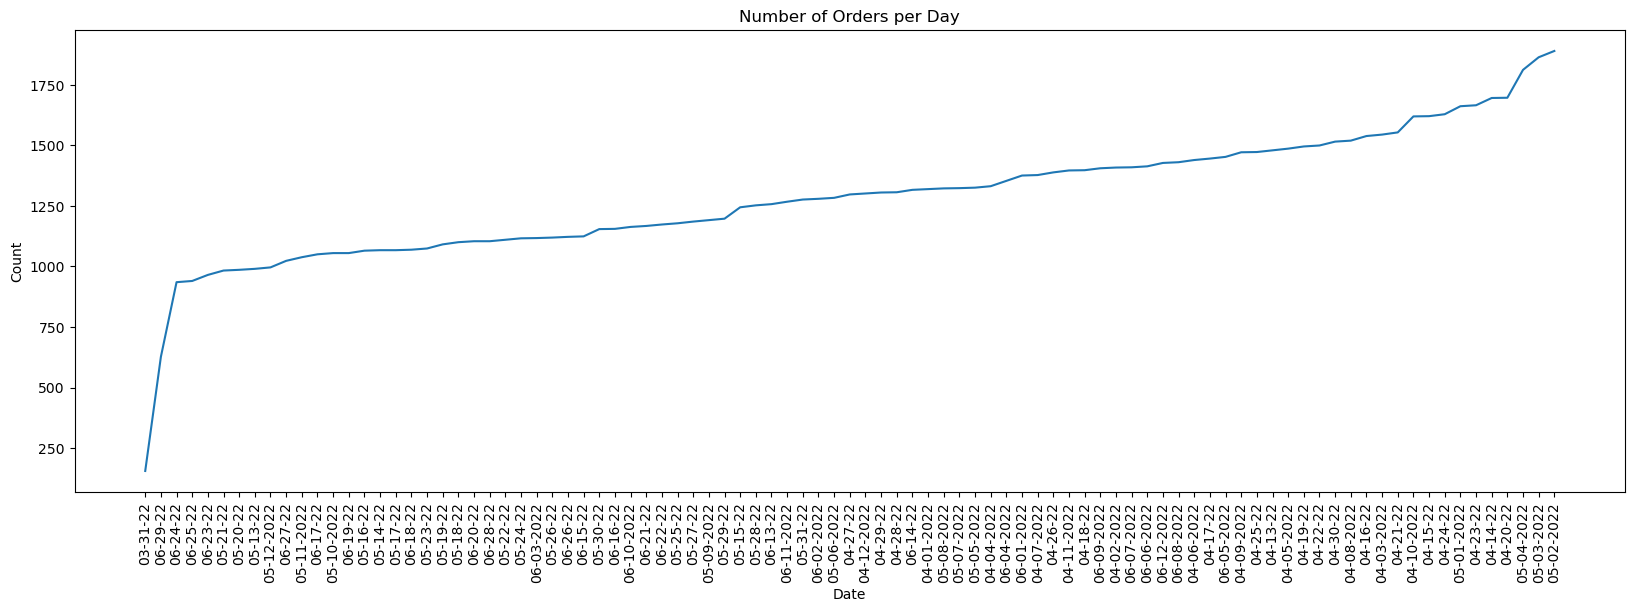

In [633]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=number_products.index, y=number_products.values)
plt.title('Number of Orders per Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()